---
title: "Lab 2"
author: "Yuan-Jyun Jhou (Trevor)"
format:
  html:
    theme: morph    
    toc: true       
    embed-resources: true
execute:
  echo: true         
jupyter: python3
---


In [207]:
# 0.Import the data and declare your package dependencies.
import pandas as pd 
import numpy as np


avocado_sales = pd.read_csv(r"C:\Users\young\OneDrive\文档\GSB544\Lab2\archive\avocado-updated-2020.csv")



There are 54 distinct geographical categories.


1. Briefly describe the data set. What information does it contain?

In [27]:
avocado_sales.head(5)

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington


This dataset contains weekly retail scanner data on Hass avocado sales and prices reported directly from retailers’ point-of-sale systems. Coverage reflects the multi-outlet panel (grocery, mass, club, drug, dollar, and military) and is available at national, regional, state, and metro levels from 2015-01-04 to 2020-11-29.

The table below explains the main columns in the dataset:

| Column name | What it means |
|-----------|----------|
| data    | The week-ending date of that sales observation. |
| average_price| The average retail price per avocado|
| total_volume |  Total number of avocados sold |
| 4046	  | Total number of avocados with PLU 4046 sold |
| 4225 | Total number of avocados with PLU 4225 sold |
| 4770 | Total number of avocados with PLU 4770 sold |
| total_bags    |The total number of avocados sold in bags|
| small_bags	|The number of avocados sold in small bags |
| large_bags |The number of avocados sold in large bags |
| xlarge_bags  |The number of avocados sold in extra-large bags|
| type | Whether it’s conventional or organic Hass avocados.|
| year | The calendar year of the observation |
| geography | The city or region of the observation |

In [11]:
2. Clean the data in any way you see fit.

In [208]:
# Count unique geographies
num_geo = avocado_sales["geography"].nunique()
print(f"There are {num_geo} distinct geographical categories.")

avocado_sales["geography"].value_counts() 

There are 54 distinct geographical categories.


geography
Albany                  612
Atlanta                 612
Baltimore/Washington    612
Boise                   612
Boston                  612
Buffalo/Rochester       612
California              612
Charlotte               612
Chicago                 612
Cincinnati/Dayton       612
Columbus                612
Dallas/Ft. Worth        612
Denver                  612
Detroit                 612
Grand Rapids            612
Great Lakes             612
Harrisburg/Scranton     612
Hartford/Springfield    612
Houston                 612
Indianapolis            612
Jacksonville            612
Las Vegas               612
Los Angeles             612
Louisville              612
Miami/Ft. Lauderdale    612
Midsouth                612
Nashville               612
New Orleans/Mobile      612
New York                612
Northeast               612
Northern New England    612
Orlando                 612
Philadelphia            612
Phoenix/Tucson          612
Pittsburgh              612
Plains    

Based the above statistis, we can catogrize the original geography variables into three new gropus: "Nation" , "Regions" , "States", "Metro Regions"

In [216]:
# Define new groups
Nation = ["Total U.S."]
Major_regions = ["California", "West", "Northeast", "Southeast", "South Central", 
           "Plains", "Midsouth", "Great Lakes"]

# new clasification 
def classify_geography(geography):
    if geography in Nation:
        return "Nation"
    elif geography in Major_regions:
        return "Major_regions"
    else:
        return "Metro_regions"


avocado_sales["New_geography"] = avocado_sales["geography"].apply(classify_geography)
avocado_sales["New_geography"].value_counts()


New_geography
Metro_regions    27537
Major_regions     4896
Nation             612
Name: count, dtype: int64

3.Which major geographical region sold the most total organic, small Hass avocados in 2017?

In [218]:
# rename PLU
avocado_sales = avocado_sales.rename(columns={
    "4046": "Small_Hass",
    "4225": "Large_Hass",
    "4770": "XLarge_Hass"
})

# filter 
Small_hass_2017 = avocado_sales[
    (avocado_sales["type"] == "organic") &
    (avocado_sales["year"] == 2017) &
    (avocado_sales["New_geography"] == "Major_regions")
]

# sort
Major_regions_sales = (
    Small_hass_2017.groupby("geography")["Small_Hass"]
    .sum()
    .sort_values(ascending=False)
)

print(Major_regions_sales)


# Answer: Among the major regions, the West sold the most total organic small Hass (PLU 4046) avocados in 2017—about 1,870,206 units.

geography
West             1870206.29
South Central    1717104.19
California       1526290.58
Northeast         925832.36
Southeast         285124.34
Great Lakes       202487.68
Midsouth          186395.50
Plains            168583.40
Name: Small_Hass, dtype: float64


4. Split the date variable into month, day, and year variables. In which month is the highest average volume of avocado sales?

In [222]:
import pandas as pd 
import numpy as np

# Define new groups
Nation = ["Total U.S."]
Major_regions = ["California", "West", "Northeast", "Southeast", "South Central", 
           "Plains", "Midsouth", "Great Lakes"]

# new clasification 
def classify_geography(geography):
    if geography in Nation:
        return "Nation"
    elif geography in Major_regions:
        return "Major_regions"
    else:
        return "Metro_regions"


avocado_sales["New_geography"] = avocado_sales["geography"].apply(classify_geography)
avocado_sales["New_geography"].value_counts()


# check the datatype of "data" 
avocado_sales["date"].dtype

parts = avocado_sales["date"].astype(str).str.split("-", expand=True)
avocado_sales["year"]  = parts[0].astype("Int64")
avocado_sales["month"] = parts[1].astype("Int64")
avocado_sales["day"]   = parts[2].astype("Int64")



#check if I succeeded to split the date varible 
avocado_sales[["date","year","month","day"]].head(2)

# Total US
monthly_avg_us = (
    avocado_sales.loc[avocado_sales["New_geography"] == "Nation"]
    .groupby("month")["total_volume"]
    .mean()
    .sort_values(ascending=False)
)

print("Nation:Average weekly avocado volume by month (units)")
print(monthly_avg_us)

# Major regions  
monthly_avg_major = (
    avocado_sales.loc[avocado_sales["New_geography"] == "Major_regions"]
    .groupby("month")["total_volume"]
    .mean()
    .sort_values(ascending=False)
)

print("Major_regions:Average weekly avocado volume by month (units)")
print(monthly_avg_major)


# Metro regions   
monthly_avg_metro = (
    avocado_sales.loc[avocado_sales["New_geography"] == "Metro_regions"]
    .groupby("month")["total_volume"]
    .mean()
    .sort_values(ascending=False)
)

print("Metro_regions:Average weekly avocado volume by month (units)")
print(monthly_avg_metro)

#Answer : 
# May has the highest average weekly avocado sales volume across all geography levels (Nation, Major regions, Metro regions).

Nation:Average weekly avocado volume by month (units)
month
5     2.293203e+07
2     2.236790e+07
6     2.144947e+07
4     2.077160e+07
3     2.035640e+07
1     2.011432e+07
7     2.009696e+07
8     1.938566e+07
9     1.847439e+07
10    1.719583e+07
11    1.673651e+07
12    1.645596e+07
Name: total_volume, dtype: float64
Major_regions:Average weekly avocado volume by month (units)
month
5     2.866504e+06
2     2.795988e+06
6     2.681183e+06
4     2.596450e+06
3     2.544550e+06
1     2.514290e+06
7     2.512120e+06
8     2.423207e+06
9     2.309299e+06
10    2.149478e+06
11    2.092064e+06
12    2.056995e+06
Name: total_volume, dtype: float64
Metro_regions:Average weekly avocado volume by month (units)
month
5     329157.166198
2     320319.598579
6     307525.158808
4     296715.682188
3     290129.055634
1     288404.703679
7     286723.500132
8     278325.173936
9     266688.612132
10    249364.581979
11    242971.370124
12    237493.910176
Name: total_volume, dtype: float64


5. Which metro area geographical regions sold the most total avocados? Plot side-by-side box-plots of the total volume for only the five metro geographical regions with the highest averages for the total_volume variable.

In [228]:
# ranking of metro regions by total volume 

avocado_sales["total_volume"] = pd.to_numeric(avocado_sales["total_volume"], errors="coerce")

avocados_total_metro = (
    avocado_sales.loc[avocado_sales["New_geography"] == "Metro_regions"]
    .groupby("geography")["total_volume"]
    .sum()
    .sort_values(ascending=False)
)

print("           Total volume by metro (units)")
print(avocados_total_metro.head(10))

# Answer: The metro region that sold the most total avocados is Los Angeles (≈ 959.4M units).

           Total volume by metro (units)
geography
Los Angeles             9.593505e+08
New York                5.282452e+08
Dallas/Ft. Worth        4.362042e+08
Houston                 4.208438e+08
Phoenix/Tucson          3.825234e+08
West Tex/New Mexico     2.806116e+08
Denver                  2.779295e+08
Baltimore/Washington    2.767646e+08
San Francisco           2.742169e+08
Chicago                 2.576650e+08
Name: total_volume, dtype: float64


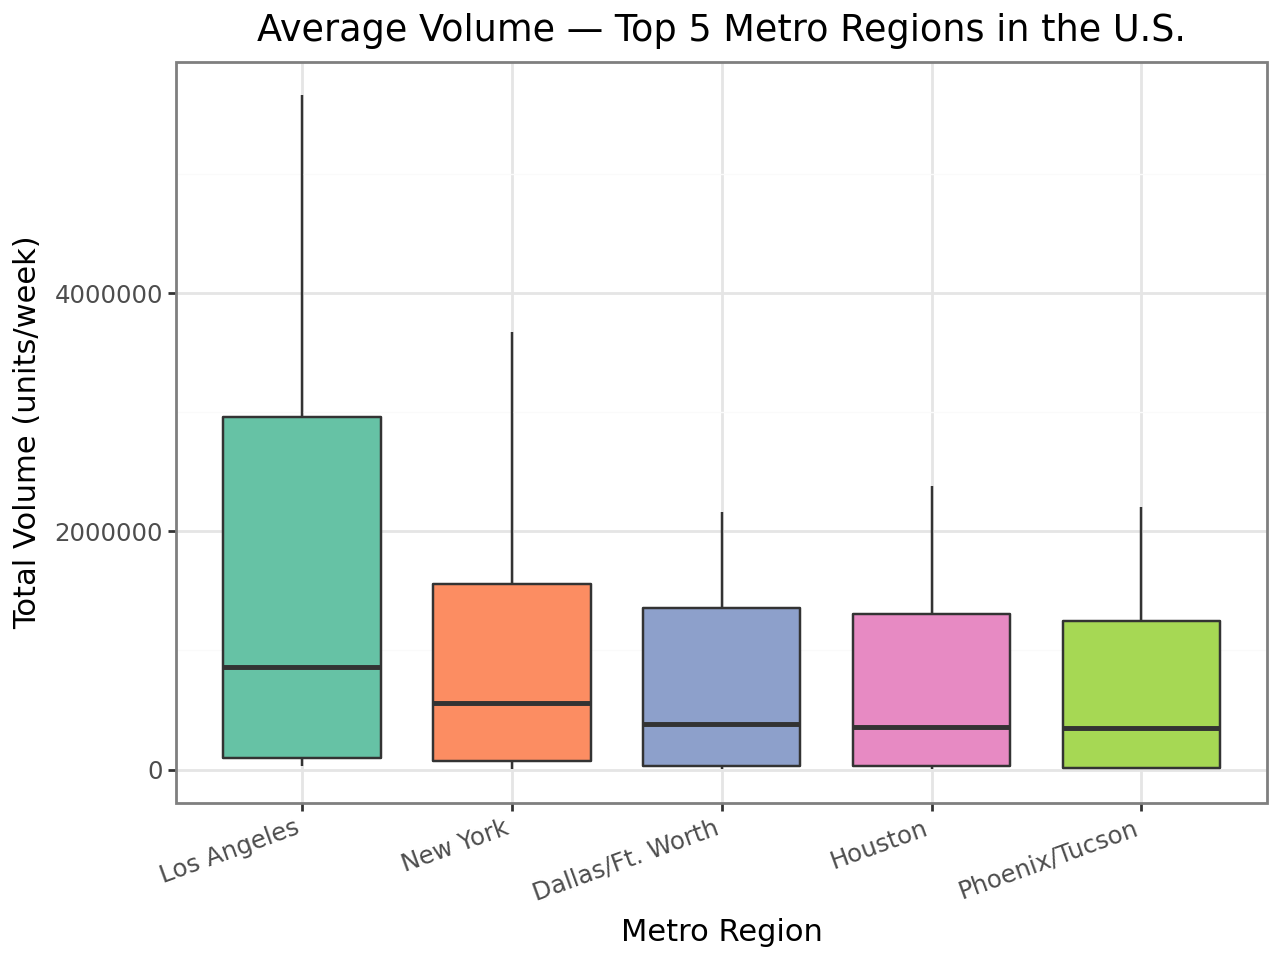

In [236]:
# ranking of metro regions by average of total volume 

from plotnine import (
    ggplot, aes, geom_boxplot, labs, theme_bw, theme, element_text, scale_fill_brewer, guides
)

metro_top5 = metro[metro["geography"].isin(top5)].copy()
metro_top5["geography"] = pd.Categorical(metro_top5["geography"], categories=top5, ordered=True)

# boxplot
p = (
    ggplot(metro_top5, aes(x="geography", y="total_volume", fill="geography")) 
    + geom_boxplot(show_legend=False)
    + scale_fill_brewer(type="qual", palette="Set2")
    + guides(fill=guide_legend(title="Metro regions"))
    + theme_bw()
    + theme(axis_text_x=element_text(rotation=20, ha="right")) 
    + labs(title="Average Volume — Top 5 Metro Regions in the U.S.",
           x="Metro Region", y="Total Volume (units/week)")
)
p

# Interpretation of the plot:
# Los Angeles has the highest median weekly volume and the widest spread (frequent high-volume weeks and big spikes), clearly above the rest.
# New York is a strong second—lower median than LA, with occasional high weeks.
# Dallas/Ft. Worth, Houston, and Phoenix/Tucson form the next tier with similar, lower medians and tighter spreads.
# By average weekly sales, Los Angeles leads by a wide margin, followed by New York; Dallas/Ft. Worth, Houston, and Phoenix/Tucson are notably lower and fairly similar to one another.

6.From your cleaned data set, create a data set with only these California regions and answer the following questions about these California regions only.

In [237]:
# save the cleaned data 
avocado_clean = avocado_sales.copy()
avocado_clean.to_csv("avocado_clean.csv", index=False)

# reloading 
import pandas as pd 

avocado_clean = pd.read_csv(r"C:\Users\young\OneDrive\文档\GSB544\Lab2\archive\avocado_clean.csv") 

# filter the california regions
California_regions = avocado_clean.loc[(avocado_clean["geography"]=="Los Angeles") | 
     (avocado_clean["geography"] == "San Diego")|(avocado_clean["geography"] == "Sacramento") | 
       (avocado_clean["geography"] == "San Francisco")]

avg_price = (California_regions
    .groupby(["geography", "type"])["average_price"]
    .mean()
    .unstack("type")                                  
)


7.In which California regions is the price of organic versus conventional avocados most different? Support your answer with a few summary statistics AND a visualization.

Organic vs Conventional price gap ($/avocado):
       geography   gap_abs
0  San Francisco  0.718954
1      San Diego  0.684510
2     Sacramento  0.578497
3    Los Angeles  0.527778


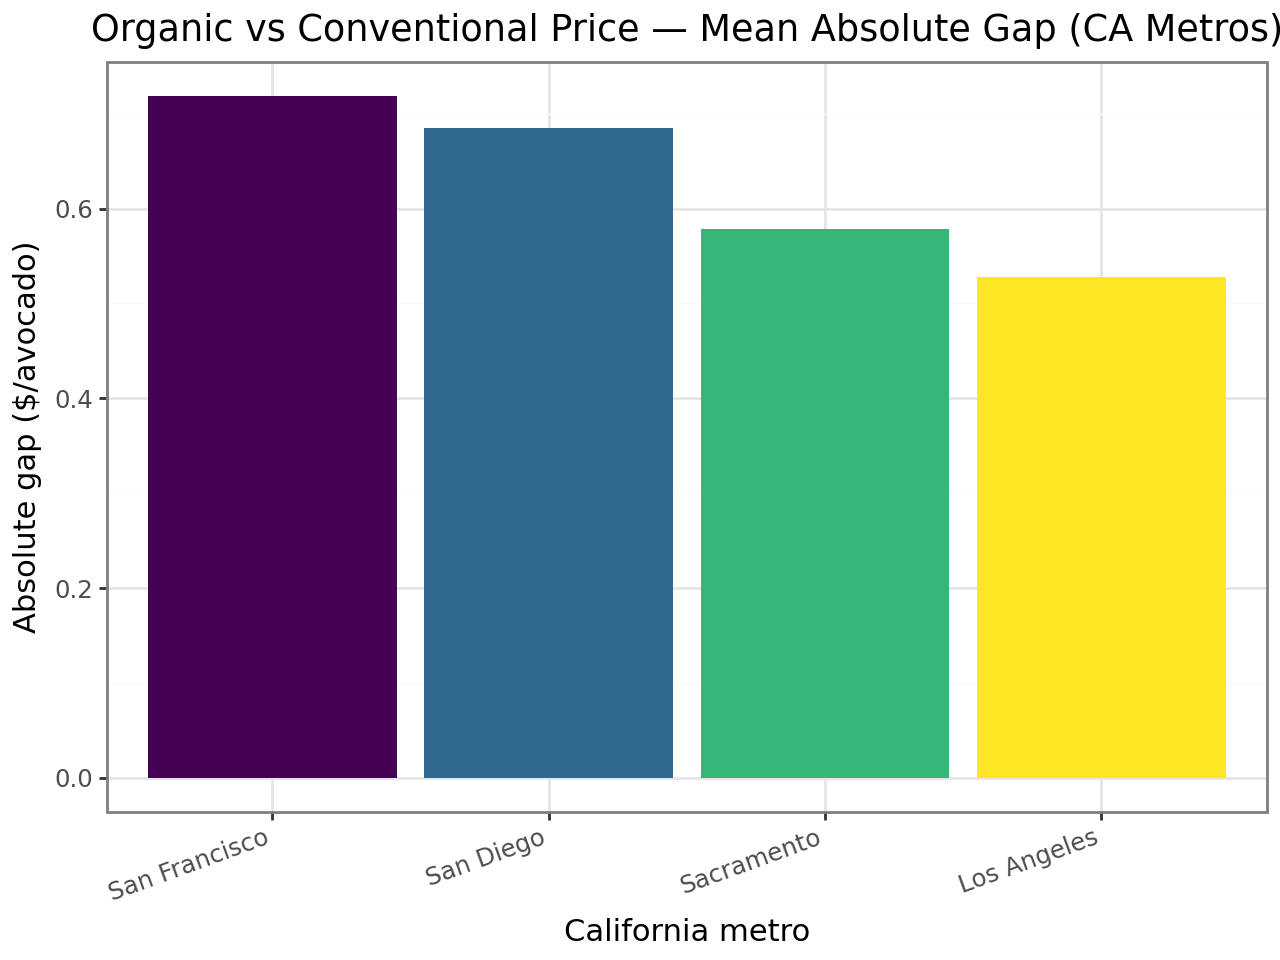

In [238]:
import pandas as pd
from plotnine import (
    ggplot, aes, geom_col, labs, theme_bw, theme, element_text
)

# 1) Averages by metro × type → wide
avg_price = (
    California_regions
    .groupby(["geography","type"])["average_price"]
    .mean()
    .unstack("type")
    .reindex(columns=["conventional","organic"])   # ensure both columns in order
)

# 2) Absolute gap and ranking
gap = (avg_price["organic"] - avg_price["conventional"]).abs()

# Drop any metros missing one of the types
gap_df = gap.dropna().sort_values(ascending=False).reset_index(name="gap_abs")

# Keep bar order = biggest gap first
gap_df["geography"] = pd.Categorical(gap_df["geography"],
                                     categories=gap_df["geography"].tolist(),
                                     ordered=True)

print("Organic vs Conventional price gap ($/avocado):")
print(gap_df)

# 3) ggplot bar chart of mean absolute gaps
p_gap = (
    ggplot(gap_df, aes(x="geography", y="gap_abs", fill="geography"))
    + geom_col(show_legend=False)
    + theme_bw()
    + labs(
        title="Organic vs Conventional Price — Mean Absolute Gap (CA Metros)",
        x="California metro", y="Absolute gap ($/avocado)"
    )
    + theme(axis_text_x=element_text(rotation=20, ha="right"))
)
p_gap


#Answer: The price difference is largest in San Francisco, followed by San Diego, then Sacramento; 
# it is smallest in Los Angeles.

8.The following plot shows, for all four California regions, the proportion of the average Hass avocado sales that are small, large, or extra large; conventional vs. organic. Recreate the plot; you do not have to replicate the exact finishing touches - e.g., color, theme - but your plot should resemble the content of this plot.

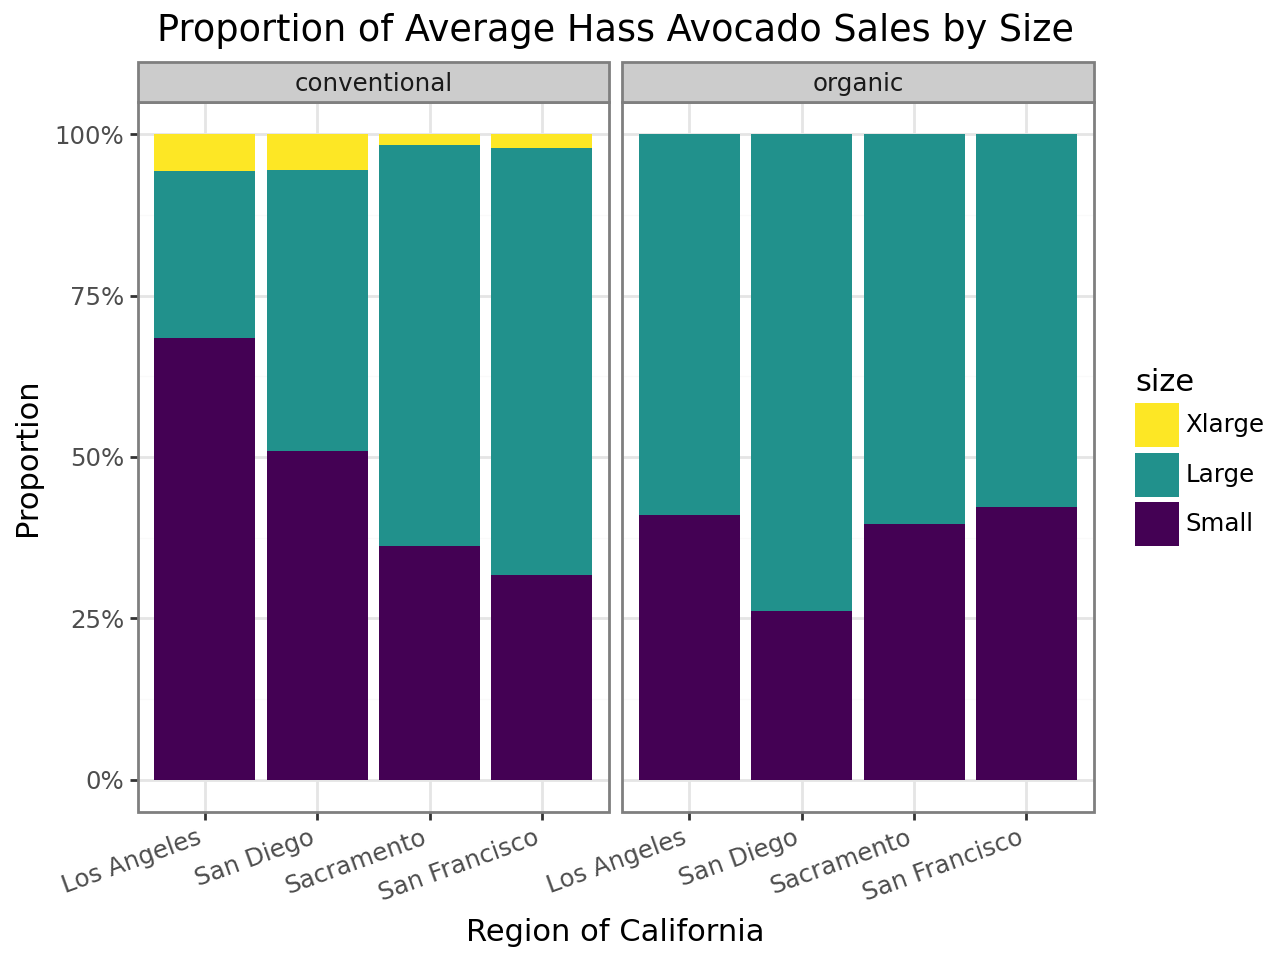

In [198]:
import pandas as pd
from plotnine import (
    ggplot, aes, geom_col, facet_wrap, labs, theme_bw, theme, element_text,
    scale_y_continuous
)
from plotnine.positions import position_stack
from plotnine import guides
from plotnine.guides import guide_legend

California_cities = ["Los Angeles", "San Diego", "Sacramento", "San Francisco"]

ca = avocado_clean.loc[
    (avocado_clean["New_geography"] == "Metro_regions") &
    (avocado_clean["geography"].isin(California_cities)),
    ["geography", "type", "4046", "4225", "4770"]
].copy()


for c in ["4046", "4225", "4770"]:
    ca[c] = pd.to_numeric(ca[c], errors="coerce")

means = (ca.groupby(["type","geography"])[["4046","4225","4770"]]
           .mean()
           .reset_index())

# Long/tidy + proportions within each (type × metro)
long = means.melt(
    id_vars=["type","geography"],
    value_vars=["4046","4225","4770"],
    var_name="PLU",
    value_name="avg_units"
)
size_map = {"4046":"Small", "4225":"Large", "4770":"Xlarge"}
long["size"] = long["PLU"].map(size_map)

long["group_total"] = long.groupby(["type","geography"])["avg_units"].transform("sum")
long = long[long["group_total"].gt(0)]
long["prop"] = long["avg_units"] / long["group_total"]


long["geography"] = pd.Categorical(long["geography"], CA_METROS, ordered=True)
long["size"] = pd.Categorical(long["size"], ["Small","Large","Xlarge"], ordered=True)

# Plot 
p = (
    ggplot(long, aes(x="geography", y="prop", fill="size"))
    + geom_col(position=position_stack(reverse=True)) 
    + facet_wrap("~type")
    + guides(fill=guide_legend(reverse=True)) 
    + theme_bw()
    + labs(
        title="Proportion of Average Hass Avocado Sales by Size",
        x="Region of California",
        y="Proportion"
    )
    + theme(axis_text_x=element_text(rotation=20, ha="right"))
    + scale_y_continuous(labels=lambda v: [f"{x:.0%}" for x in v])
)
p


Find or assemble a data set of real data, with house prices for these four California regions. Join this data set with your California avocado data set.
Use your new joined data set to make an argument about the relationship between house prices and avocado prices/sales.
Support your argument with a plot

C:\Users\young\AppData\Local\Temp\ipykernel_21356\2095052611.py:55: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


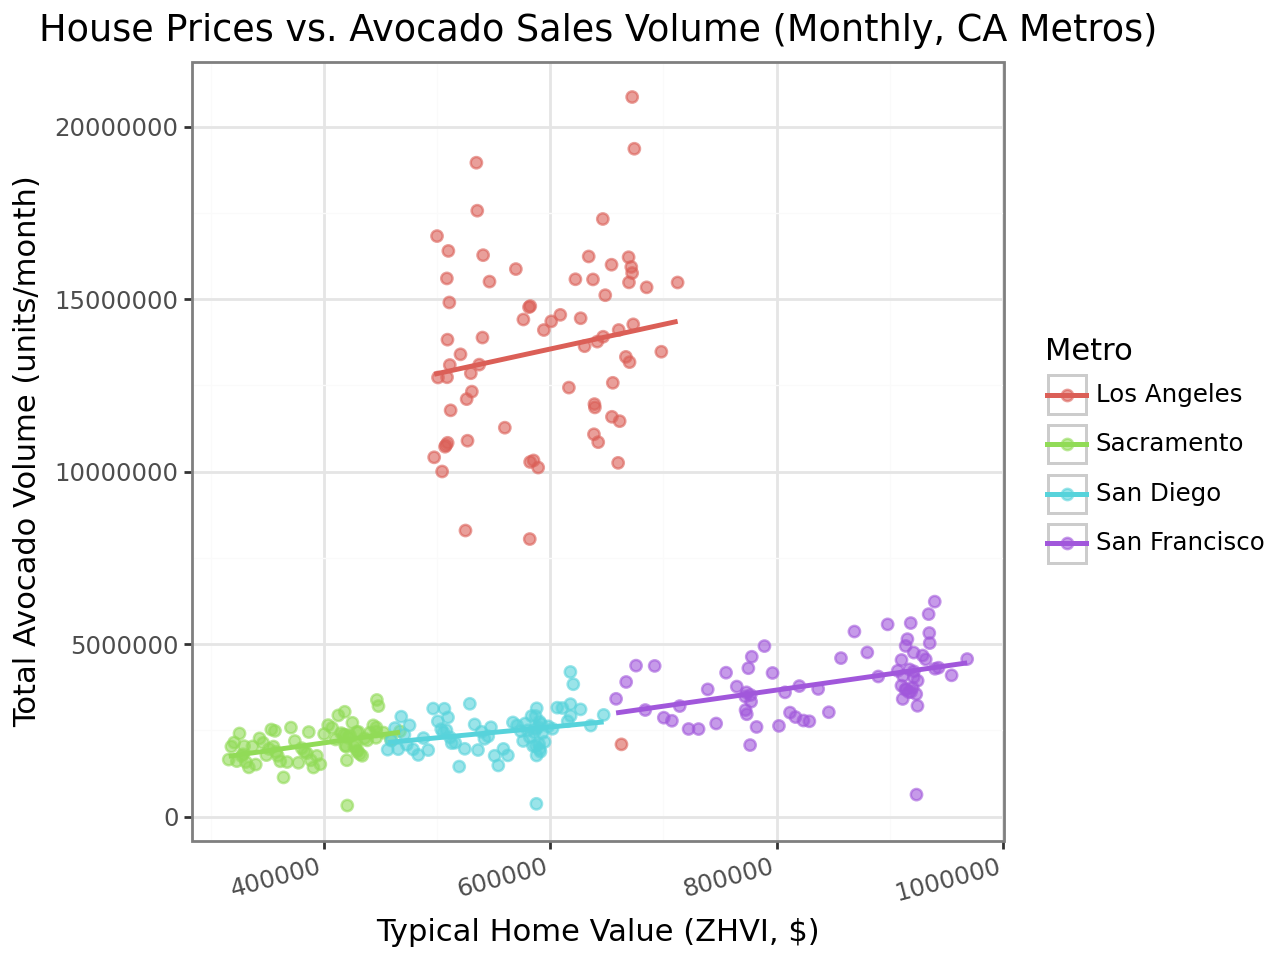

In [239]:
import pandas as pd
import numpy as np
from pathlib import Path
from plotnine import (
    ggplot, aes, geom_point, geom_smooth, facet_wrap,
    theme_bw, labs, theme, element_text
)


CA_METROS = ["Los Angeles", "San Diego", "Sacramento", "San Francisco"]
zhvi_path = Path(r"C:\Users\young\Downloads\Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")  

# ZHVI (Metro) → monthly long for 4 CA metros from Zillow 
zhvi = pd.read_csv(zhvi_path)

# ZHVI has many ID columns + monthly columns like "2015-01", "2015-02", ...
date_cols = [c for c in zhvi.columns if pd.Series([c]).str.match(r"^\d{4}-\d{2}(-\d{2})?$").any()]
id_cols   = [c for c in zhvi.columns if c not in date_cols]

zhvi_long = zhvi.melt(id_vars=id_cols, value_vars=date_cols,
                      var_name="month", value_name="zhvi")

def map_to_four(name: str):
    name = str(name)
    if "Los Angeles"   in name: return "Los Angeles"    
    if "San Diego"     in name: return "San Diego"
    if "Sacramento"    in name: return "Sacramento"
    if "San Francisco" in name: return "San Francisco" 
    return None

if "RegionName" not in zhvi.columns:
    raise ValueError("Expected a 'RegionName' column in the Zillow file.")

zhvi_long["geography"] = zhvi_long["RegionName"].map(map_to_four)
zhvi_long = zhvi_long.dropna(subset=["geography"]).copy()
zhvi_long["month"] = pd.to_datetime(zhvi_long["month"], errors="coerce").dt.to_period("M").dt.to_timestamp()

zhvi_monthly = zhvi_long.groupby(["geography","month"], as_index=False)["zhvi"].mean()

#  Avocado → monthly (volume-weighted price + total volume) --------
avo = avocado_clean.loc[
    (avocado_clean["New_geography"] == "Metro_regions") &
    (avocado_clean["geography"].isin(CA_METROS)),
    ["geography", "date", "average_price", "total_volume"]
].copy()

avo["date"]  = pd.to_datetime(avo["date"], errors="coerce")
avo["month"] = avo["date"].dt.to_period("M").dt.to_timestamp()

def _agg(g):
    vol_sum = g["total_volume"].sum()
    wavg_price = (g["average_price"] * g["total_volume"]).sum() / vol_sum if vol_sum > 0 else np.nan
    return pd.Series({"avo_price_wt": wavg_price, "avo_volume": vol_sum})

avo_monthly = avo.groupby(["geography","month"], as_index=False).apply(_agg)

# JOIN 
joined = pd.merge(avo_monthly, zhvi_monthly, on=["geography","month"], how="inner")
joined = joined.dropna(subset=["avo_price_wt","avo_volume","zhvi"]).copy()


# PLOTS 

# A) House prices vs avocado price (volume-weighted), with trend lines
p_price = (
    ggplot(joined, aes(x="zhvi", y="avo_price_wt", color="geography"))
    + geom_point(alpha=0.6, size=1.8)
    + geom_smooth(method="lm", se=False)
    + theme_bw()
    + labs(
        title="House Prices vs. Avocado Prices (Monthly, CA Metros)",
        x="Typical Home Value (ZHVI, $)",
        y="Volume-weighted Avocado Price ($/unit)",
        color="Metro"
    )
    + theme(axis_text_x=element_text(rotation=15, ha="right"))
)
p_price

# B) Same idea for sales volume (often helpful; remove if you only want price)
p_vol = (
    ggplot(joined, aes(x="zhvi", y="avo_volume", color="geography"))
    + geom_point(alpha=0.6, size=1.8)
    + geom_smooth(method="lm", se=False)
    + theme_bw()
    + labs(
        title="House Prices vs. Avocado Sales Volume (Monthly, CA Metros)",
        x="Typical Home Value (ZHVI, $)",
        y="Total Avocado Volume (units/month)",
        color="Metro"
    )
    + theme(axis_text_x=element_text(rotation=15, ha="right"))
)
p_vol


In [242]:
# Correlation of monthly house prices (ZHVI) with avocado PRICE (volume-weighted)
corr_price = (
    joined.groupby("geography")
          .apply(lambda g: g["avo_price_wt"].corr(g["zhvi"]))
          .round(2)
          .rename("corr_price_vs_house")
)

# Correlation of monthly house prices (ZHVI) with avocado SALES VOLUME
corr_vol = (
    joined.groupby("geography")
          .apply(lambda g: g["avo_volume"].corr(g["zhvi"]))
          .round(2)
          .rename("corr_volume_vs_house")
)

corr_table = pd.concat([corr_price, corr_vol], axis=1)
print(corr_table)


print("\nPrice corr min/max:")
print(f"Min: {corr_price.idxmin()} = {corr_price.min():.2f}")
print(f"Max: {corr_price.idxmax()} = {corr_price.max():.2f}")

print("\nVolume corr min/max:")
print(f"Min: {corr_vol.idxmin()} = {corr_vol.min():.2f}")
print(f"Max: {corr_vol.idxmax()} = {corr_vol.max():.2f}")


               corr_price_vs_house  corr_volume_vs_house
geography                                               
Los Angeles                   0.51                  0.16
Sacramento                    0.24                  0.40
San Diego                     0.41                  0.28
San Francisco                 0.12                  0.42

Price corr min/max:
Min: San Francisco = 0.12
Max: Los Angeles = 0.51

Volume corr min/max:
Min: Los Angeles = 0.16
Max: San Francisco = 0.42


C:\Users\young\AppData\Local\Temp\ipykernel_21356\3896357036.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
C:\Users\young\AppData\Local\Temp\ipykernel_21356\3896357036.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


Analysis:After joining Zillow’s metro-level home values (ZHVI) to monthly avocado data (volume-weighted price and total volume) for Los Angeles, San Diego, Sacramento, and San Francisco, the associations are weak–to–moderate and inconsistent across metros. The correlation between house prices and avocado price ranges from 0.12 (SF) to 0.51 (LA); between house prices and sales volume it ranges from 0.16 (LA) to 0.42 (SF). These modest and mixed relationships, together with the wide scatter in the plots, provide no robust evidence that higher housing costs are associated with higher avocado prices or sales. Threfore,the avocado toast explanation doesn’t really add up.　